# Grouping galaxies by their group and creating a group size column

In this document we import galaxy data, which have been matched by group using TOPCAT, and create a column for the size of the group.

First we import the data set which we which to group into sizes. We display the head to get an idea of what the data looks like.

In [187]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np

# Import .fits data as a table
filename = "Data\Group Data (Yang)\galaxy_group_data_C.fits" # All galaxies in group data set
# filename = "Data\GZ2_main_with_group_data_half_arcsec.fits" # GZ2 galaxies that have been matched to group data set

with fits.open(filename) as data:
    group_data = Table(data[1].data)

display(group_data[0:5])

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,67926,1,1,67926,750,1,67926,38.04913268,0.22402609,0.0540216,9.9868,10.4001,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,-2147483648
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,23485,2,2,23485,751,2,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,23485,1,1,23485,752,3,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,67927,1,1,67927,994,4,67927,54.45034082,0.57260624,0.1385037,10.1958,10.5868,12.3102,12.346,7.7948,7.9976,1.0,-1,-1,-2147483648,-2147483648
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,67928,1,1,67928,1010,5,67928,54.53488061,0.57861477,0.1289553,10.2077,10.6528,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,-2147483648


Next we create a pandas dataframe from the astropy table, in order to use the pandas groupby method. We group the data by "group id", and create a new column that gives the size of the group.

We display the head again to see the new column.

In [188]:
group_data_pandas = group_data.to_pandas()
group_data_pandas["group_size"] = group_data_pandas.groupby("group id_1")["group id_1"].transform("size")

group_data = Table.from_pandas(group_data_pandas)
group_data[0:5]

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,67926,1,1,67926,750,1,67926,38.04913268,0.22402609,0.0540216,9.9868,10.4001,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,-2147483648,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,23485,2,2,23485,751,2,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,23485,1,1,23485,752,3,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,67927,1,1,67927,994,4,67927,54.45034082,0.57260624,0.1385037,10.1958,10.5868,12.3102,12.346,7.7948,7.9976,1.0,-1,-1,-2147483648,-2147483648,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,67928,1,1,67928,1010,5,67928,54.53488061,0.57861477,0.1289553,10.2077,10.6528,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,-2147483648,1


The group size column created when merging thhe tables in TOPCAT has null values -2147483648 when the group size is 1. We replace these values with 1 here as they should be. Then we check that the two group size columns are equal.

In [195]:
group_data_pandas.loc[group_data_pandas["GroupSize_topcat"] == -2147483648, "GroupSize_topcat"] = 1
display(group_data_pandas.head())

print((group_data_pandas["GroupSize_topcat"] == group_data_pandas["group_size"]).all())

,galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,...,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
0,1,750,38.049133,0.224026,0.054022,15.939070,17.620001,0.994186,-20.207098,0.906209,...,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,1,1
1,2,751,38.352526,0.212491,0.053818,16.786047,17.620001,0.987805,-19.363531,0.820707,...,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
2,3,752,38.363598,0.210654,0.054050,15.090300,17.620001,0.987805,-20.966141,0.758547,...,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
3,4,994,54.450341,0.572606,0.138504,17.604034,17.620001,0.918367,-20.681068,0.880466,...,12.3102,12.3460,7.7948,7.9976,1.0,-1,-1,-2147483648,1,1
4,5,1010,54.534881,0.578615,0.128955,17.415402,17.620001,0.918367,-20.712832,0.918161,...,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,1,1


True


For interest, we plot a quick histogram of group size.

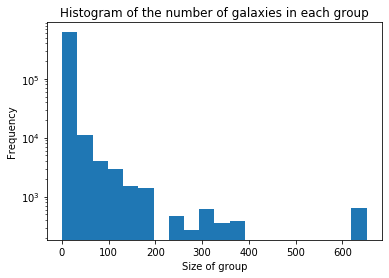

In [196]:
plt.hist(group_data["group_size"], bins=20)
plt.yscale("log")
plt.xlabel("Size of group")
plt.ylabel("Frequency")
plt.title("Histogram of the number of galaxies in each group")
plt.show()

Now we convert the pandas datafram back to an astropy table, as we want to save the data as a .fits file.
<br>
We then save the data.

In [201]:
group_data = Table.from_pandas(group_data_pandas)
# group_data.write("Data\galaxy_group_data_C_with_size.fits", format="fits")